In [61]:
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report, precision_recall_curve, average_precision_score
from sklearn import preprocessing

from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV


In [62]:
data = pd.read_csv("churn.csv")

print(data.shape)
data.head()

(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [63]:
data['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

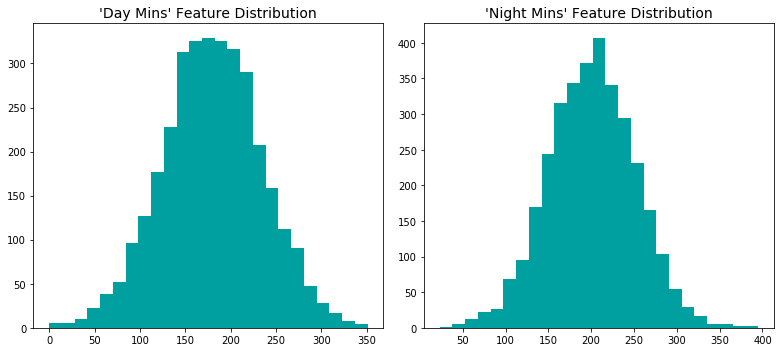

In [65]:
fig = pl.figure(figsize = (11,5));

# Skewed feature plotting
for i, feature in enumerate(['Day Mins','Night Mins']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)

fig.tight_layout()
fig.show()

In [66]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [67]:
var = ['State','Phone','Int\'l Plan','VMail Plan']
for v in var:
    print '\nFrequency count for variable %s'%v
    print data[v].value_counts()


Frequency count for variable State
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Frequency count for variable Phone
385-6952    1
405-5403    1
368-6174    1
353-7730    1
370-7565    1
346-6352    1
387-7371    1
384-1621    1
369-2625    1
372-3987    1
411-1530    1
417-4810    1
355-9581    1
383-9448    1
400-5751    1
344-9302    1
413-7743    1
397-4968    1
362-7581    1
336-5920    1
376-4292    1
386-7118    1
347-5354    1
405-2831    1
417-5320    1
390-9735    1
420-7692    1
419-6564    1


In [68]:
data.drop('State',axis=1,inplace=True)
data.drop('Phone',axis=1,inplace=True)

In [69]:
data = data.rename(index=str, columns={"Int\'l Plan": "Intl Plan", "Churn?":"Churn"})

In [70]:
data.apply(lambda x: sum(x.isnull()))

Account Length    0
Area Code         0
Intl Plan         0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [55]:
#data['Churn'] = data.apply(lambda x: 1 if x == 'True.' else 0) 

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Intl Plan','VMail Plan']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [73]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index([u'Account Length', u'Area Code', u'VMail Message', u'Day Mins',
       u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge',
       u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins',
       u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'Churn',
       u'Intl Plan_0', u'Intl Plan_1', u'VMail Plan_0', u'VMail Plan_1'],
      dtype='object')

In [75]:
churn = data['Churn']
X = data.drop('Churn', axis = 1)

y = churn.apply(lambda x: 1 if x == 'True.' else 0) 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [138]:
def modelfit(alg, X_train, y_train, X_test, y_test, predictors, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_pred = alg.predict(X_test)
    y_predprob = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=5, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob)
    
    print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [139]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test):
    
    results = {}
    
    learner = learner.fit(X_train,y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)

    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    beta=0.5
    results['f_train'] = fbeta_score(y_train,predictions_train,beta)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta)
       
    print "{} : {} samples are trained.".format(learner.__class__.__name__, len(X_train))
    return results

In [140]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_A = AdaBoostClassifier()
clf_B = DecisionTreeClassifier()
clf_C = GradientBoostingClassifier()
clf_D = RandomForestClassifier()

results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

AdaBoostClassifier : 2666 samples are trained.
DecisionTreeClassifier : 2666 samples are trained.
GradientBoostingClassifier : 2666 samples are trained.
RandomForestClassifier : 2666 samples are trained.


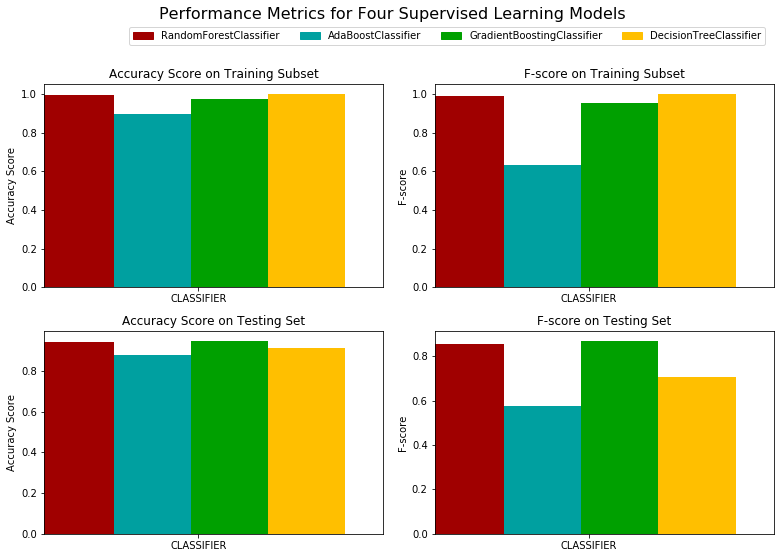

In [141]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


fig, ax = pl.subplots(2, 2, figsize = (11,7))

# Constants
bar_width = 0.5
colors = ['#A00000','#00A0A0','#00A000','#FFBF00']

# Super loop to plot four panels of data
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['acc_train', 'f_train','acc_test', 'f_test']):
#        for i in np.arange(3):
            # Creative plot code
        ax[j/2, j%2].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
        #ax[j/2, j%2].set_xticks([0.45, 1.45, 2.45])
        
        ax[j/2, j%2].set_xticks([0.8])
        ax[j/2, j%2].set_xticklabels(["CLASSIFIER"])
        ax[j/2, j%2].set_xlim((-0.2, 2.0))

# Add unique y-labels
ax[0, 0].set_ylabel("Accuracy Score")
ax[0, 1].set_ylabel("F-score")
ax[1, 0].set_ylabel("Accuracy Score")
ax[1, 1].set_ylabel("F-score")

# Add titles
ax[0, 0].set_title("Accuracy Score on Training Subset")
ax[0, 1].set_title("F-score on Training Subset")
ax[1, 0].set_title("Accuracy Score on Testing Set")
ax[1, 1].set_title("F-score on Testing Set")

patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))

    pl.legend(handles = patches, bbox_to_anchor = (-.9, 2.5), \
           loc = 'upper left', borderaxespad = 0., ncol = 4, fontsize = 'medium')

# Aesthetics
pl.suptitle("Performance Metrics for Four Supervised Learning Models", fontsize = 16, y = 1.10)
pl.tight_layout()
pl.show()


Model Report
Accuracy : 0.9505
AUC Score (Train): 0.927055
CV Score : Mean - 0.9129597 | Std - 0.02571439 | Min - 0.8650236 | Max - 0.9424252


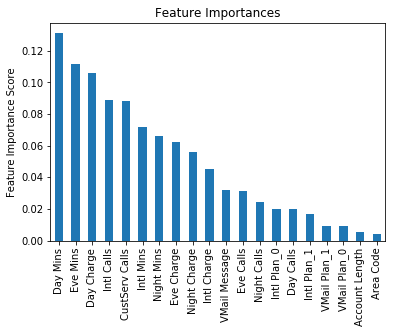

In [143]:
gbm0 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, 
                                  subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
                                  random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, 
                                  warm_start=False, presort='auto')
predictors = [x for x in X_train.columns]
#print predictors
modelfit(gbm0, X_train, y_train, X_test, y_test, predictors)

In [97]:
param_test1 = {'n_estimators':range(20,201,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=2,
                                  min_samples_leaf=1, max_depth=8, max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.94149, std: 0.00969, params: {'n_estimators': 20},
  mean: 0.94337, std: 0.00910, params: {'n_estimators': 30},
  mean: 0.94487, std: 0.00920, params: {'n_estimators': 40},
  mean: 0.94674, std: 0.00695, params: {'n_estimators': 50},
  mean: 0.94712, std: 0.00595, params: {'n_estimators': 60},
  mean: 0.94786, std: 0.00630, params: {'n_estimators': 70},
  mean: 0.94787, std: 0.00683, params: {'n_estimators': 80},
  mean: 0.94674, std: 0.00724, params: {'n_estimators': 90},
  mean: 0.94712, std: 0.00618, params: {'n_estimators': 100},
  mean: 0.94749, std: 0.00526, params: {'n_estimators': 110},
  mean: 0.94749, std: 0.00514, params: {'n_estimators': 120},
  mean: 0.94712, std: 0.00504, params: {'n_estimators': 130},
  mean: 0.94862, std: 0.00508, params: {'n_estimators': 140},
  mean: 0.94862, std: 0.00494, params: {'n_estimators': 150},
  mean: 0.94974, std: 0.00642, params: {'n_estimators': 160},
  mean: 0.95049, std: 0.00599, params: {'n_estimators': 170},
  mean: 0.95049,

In [99]:
param_test2 = {'max_depth':range(1,16,2), 'min_samples_split':range(2,1001,200)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, 
                                                                #min_samples_split=2, max_depth=8,
                                  min_samples_leaf=1, max_features=None, subsample=1.0, random_state=42), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87509, std: 0.01287, params: {'min_samples_split': 2, 'max_depth': 1},
  mean: 0.87509, std: 0.01287, params: {'min_samples_split': 202, 'max_depth': 1},
  mean: 0.87509, std: 0.01287, params: {'min_samples_split': 402, 'max_depth': 1},
  mean: 0.87509, std: 0.01287, params: {'min_samples_split': 602, 'max_depth': 1},
  mean: 0.87509, std: 0.01287, params: {'min_samples_split': 802, 'max_depth': 1},
  mean: 0.95461, std: 0.00562, params: {'min_samples_split': 2, 'max_depth': 3},
  mean: 0.94036, std: 0.00873, params: {'min_samples_split': 202, 'max_depth': 3},
  mean: 0.93174, std: 0.01140, params: {'min_samples_split': 402, 'max_depth': 3},
  mean: 0.92836, std: 0.01187, params: {'min_samples_split': 602, 'max_depth': 3},
  mean: 0.92611, std: 0.01279, params: {'min_samples_split': 802, 'max_depth': 3},
  mean: 0.95574, std: 0.00611, params: {'min_samples_split': 2, 'max_depth': 5},
  mean: 0.94374, std: 0.00778, params: {'min_samples_split': 202, 'max_depth': 5},
  mean: 0.

In [100]:
param_test3 = {'min_samples_leaf':range(1,21,1)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, 
                                    max_features=None, subsample=1.0, random_state=42, min_samples_split=2, max_depth=5,
                                    #min_samples_leaf=1
                                                              ), 
                       param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.95574, std: 0.00611, params: {'min_samples_leaf': 1},
  mean: 0.95612, std: 0.00816, params: {'min_samples_leaf': 2},
  mean: 0.95537, std: 0.00641, params: {'min_samples_leaf': 3},
  mean: 0.95537, std: 0.00684, params: {'min_samples_leaf': 4},
  mean: 0.95537, std: 0.00522, params: {'min_samples_leaf': 5},
  mean: 0.95537, std: 0.00694, params: {'min_samples_leaf': 6},
  mean: 0.95424, std: 0.00450, params: {'min_samples_leaf': 7},
  mean: 0.95574, std: 0.00510, params: {'min_samples_leaf': 8},
  mean: 0.95274, std: 0.00494, params: {'min_samples_leaf': 9},
  mean: 0.95199, std: 0.00553, params: {'min_samples_leaf': 10},
  mean: 0.95424, std: 0.00454, params: {'min_samples_leaf': 11},
  mean: 0.95311, std: 0.00265, params: {'min_samples_leaf': 12},
  mean: 0.95236, std: 0.00451, params: {'min_samples_leaf': 13},
  mean: 0.95424, std: 0.00539, params: {'min_samples_leaf': 14},
  mean: 0.95199, std: 0.00388, params: {'min_samples_leaf': 15},
  mean: 0.95537, std: 0.00492, par

In [102]:
param_test4 = {'max_features':range(1,20,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, 
                                    #max_features=None, 
                                    subsample=1.0, random_state=42, min_samples_split=2, max_depth=5,
                                    min_samples_leaf=2), 
                       param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.92612, std: 0.00837, params: {'max_features': 1},
  mean: 0.95349, std: 0.00506, params: {'max_features': 3},
  mean: 0.95612, std: 0.00344, params: {'max_features': 5},
  mean: 0.95499, std: 0.00616, params: {'max_features': 7},
  mean: 0.95612, std: 0.00799, params: {'max_features': 9},
  mean: 0.95649, std: 0.00664, params: {'max_features': 11},
  mean: 0.95499, std: 0.00627, params: {'max_features': 13},
  mean: 0.95649, std: 0.00814, params: {'max_features': 15},
  mean: 0.95687, std: 0.00720, params: {'max_features': 17},
  mean: 0.95424, std: 0.00644, params: {'max_features': 19}],
 {'max_features': 17},
 0.9568669470755118)


Model Report
Accuracy : 0.955
AUC Score (Train): 0.914477
CV Score : Mean - 0.903292 | Std - 0.02278571 | Min - 0.8614534 | Max - 0.9241809


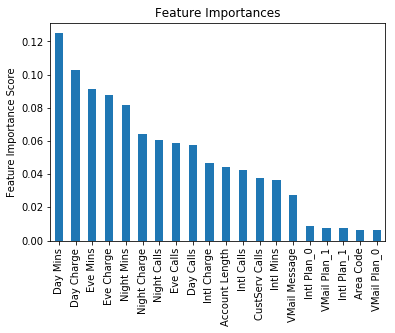

In [147]:
gmb_final = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, 
                                    max_features=17, 
                                    subsample=1.0, random_state=42, min_samples_split=2, max_depth=5,
                                    min_samples_leaf=2)

modelfit(gmb_final, X_train, y_train, X_test, y_test, predictors)

In [118]:
importances = gmb_final.feature_importances_


Model Report
Accuracy : 0.9175
AUC Score (Train): 0.875958
CV Score : Mean - 0.8563718 | Std - 0.02638504 | Min - 0.8097432 | Max - 0.8876638


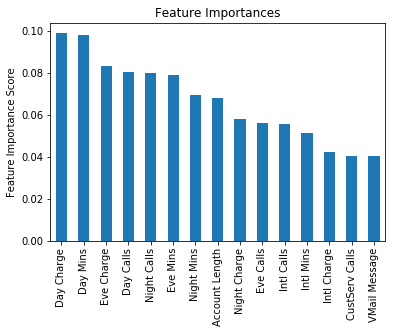

In [145]:
# Reduce the feature space

clm=(np.argsort(importances)[::-1])[:15]

X_train_reduced = X_train[X_train.columns.values[clm]]
X_test_reduced = X_test[X_test.columns.values[clm]]

X_train_reduced.head()
X_test_reduced.head()

predictors_red = [x for x in X_train_reduced.columns]

gmb_final_red = GradientBoostingClassifier(n_estimators=190, learning_rate=0.1, 
                                    max_features=15, 
                                    subsample=1.0, random_state=42, min_samples_split=2, max_depth=5,
                                    min_samples_leaf=2)

modelfit(gmb_final_red, X_train_reduced, y_train, X_test_reduced, y_test, predictors_red)
